 #  A Portfolio-Inflation Analyser
 ---

 In this project, we will use what we have learned over the past few weeks to evaluate the performance of 3 kinds of portfolios (a) Conservative (b) Growth and (c) Moderate over the last 10 years. We will evaluate which asset classes performed better and what was the impact of inflation. Lastly, we will provide recommendations on how you can rebalance your investments to reduce the effect of inflation. 
 Few points to keep in mind: 1. Use panda's to clean and format data sets 2. Describe the data exploration and cleanup  3. Create 6-8 visulaizations  4. Aggregate the visulaizations into a dashboard 5. Use an API and atleast one new python library
 

In [96]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline


# Data Gathering

We used the Google Finance function to obtain the data for last 10 years for the following Tickers
and saved them as csv files (formatted Date to remove time component) in Resources Folder.

* VTSMX	Vanguard Total Stock Mkt Idx Inv: ' =GOOGLEFINANCE("VTSMX", "price", "1/1/2012", "12/31/2021", "DAILY") '
* VGTSX	Vanguard Total Intl Stock Index Inv: ' =GOOGLEFINANCE("VGTSX", "price", "1/1/2012", "12/31/2021", "DAILY") '
* VBMFX	Vanguard Total Bond Market Index Inv: ' =GOOGLEFINANCE("VBMFX", "price", "1/1/2017", "12/31/2021", "DAILY") '
* PIGLX	PIMCO Global Bond Opps (Unhedged): ' =GOOGLEFINANCE("PIGLX", "price", "1/1/2017", "12/31/2021", "DAILY")' '

Files:

* `VTSMX_data.csv`: Contains closing prices of Vanguard Total Stock Mkt Idx Inv

* `VGTSX_data.csv`: Contains closing prices of Vanguard Total Intl Stock Index Inv

* `VBMFX_data.csv`: Contains closing prices of Vanguard Total Bond Market Index Inv

* `PIGLX_data.csv`: Contains closing prices of PIMCO Global Bond Opps (Unhedged)

# Data Cleaning

In this section, we read the CSV files into DataFrames and perform any necessary data cleaning steps

## VTSMX Data
Read the VTSMX csv and clean the data.

In [97]:
# Set the Path
vtsmx_data = Path("Resources/VTSMX_data.csv")

# Read the historic closing prices and create a new daily returns DataFrame from the data. 
vtsmx_df = pd.read_csv(vtsmx_data, index_col="Date", infer_datetime_format=True, parse_dates=True)

# Sort DataFrame by Date Index
vtsmx_df.sort_index(inplace=True)
vtsmx_df.head()

,Close
Date,
2012-01-03,31.76
2012-01-04,31.75
2012-01-05,31.87
2012-01-06,31.81
2012-01-09,31.90


In [98]:
# Check Data Types
print(vtsmx_df.dtypes)

Close    float64
dtype: object


In [99]:
# Sample DataFrame so it contains closing for month ends
# Monthly Data will be used later as Inflation data is monthly
vtsmx_df = vtsmx_df.resample('M').last()
vtsmx_df

,Close
Date,
2012-01-31,32.88
2012-02-29,34.28
2012-03-31,35.19
2012-04-30,34.96
2012-05-31,32.78
...,...
2021-08-31,113.46
2021-09-30,108.06
2021-10-31,115.31


In [100]:
# Calculate Monthly Returns
vtsmx_df['Monthly Returns'] = vtsmx_df['Close'].pct_change()
vtsmx_df.head()

,Close,Monthly Returns
Date,,
2012-01-31,32.88,NaN
2012-02-29,34.28,0.042579
2012-03-31,35.19,0.026546
2012-04-30,34.96,-0.006536
2012-05-31,32.78,-0.062357


In [101]:
# Rename `Close` & 'Returns' Columns to be specific  
columns = ["VTSMX Close", "VTSMX Returns"]
vtsmx_df.columns = columns
vtsmx_df.head()

,VTSMX Close,VTSMX Returns
Date,,
2012-01-31,32.88,NaN
2012-02-29,34.28,0.042579
2012-03-31,35.19,0.026546
2012-04-30,34.96,-0.006536
2012-05-31,32.78,-0.062357


In [102]:
# Count nulls
vtsmx_df.isnull().sum()

VTSMX Close      0
VTSMX Returns    1
dtype: int64

In [103]:
# Drop nulls - Used the `dropna` function to drop whole records that have at least one null value
vtsmx_df.dropna(inplace=True)
# Check no more nulls
vtsmx_df.isnull().sum()

VTSMX Close      0
VTSMX Returns    0
dtype: int64

## VGTSX Data
Read the VGTSX csv and clean the data.


In [104]:
# Set the Path
vgtsx_data = Path("Resources/VGTSX_data.csv")

# Read the historic closing prices and create a new daily returns DataFrame from the data. 
vgtsx_df = pd.read_csv(vgtsx_data, index_col="Date", infer_datetime_format=True, parse_dates=True)

# Sort DataFrame by Date Index
vgtsx_df.sort_index(inplace=True)
vgtsx_df.head()

,Close
Date,
2012-01-03,13.43
2012-01-04,13.39
2012-01-05,13.23
2012-01-06,13.11
2012-01-09,13.15


In [105]:
# Check Data Types
print(vgtsx_df.dtypes)

Close    float64
dtype: object


In [106]:
# Sample DataFrame so it contains closing for month ends
# Monthly Data will be used later as Inflation data is monthly
vgtsx_df = vgtsx_df.resample('M').last()
vgtsx_df

,Close
Date,
2012-01-31,14.01
2012-02-29,14.73
2012-03-31,14.62
2012-04-30,14.36
2012-05-31,12.76
...,...
2021-08-31,21.16
2021-09-30,20.33
2021-10-31,20.86


In [107]:
# Calculate Monthly Returns
vgtsx_df['Monthly Returns'] = vgtsx_df['Close'].pct_change()
vgtsx_df.head()

,Close,Monthly Returns
Date,,
2012-01-31,14.01,NaN
2012-02-29,14.73,0.051392
2012-03-31,14.62,-0.007468
2012-04-30,14.36,-0.017784
2012-05-31,12.76,-0.111421


In [108]:
# Rename `Close` & 'Returns' Columns to be specific  
columns = ["VGTSX Close", "VGTSX Returns"]
vgtsx_df.columns = columns
vgtsx_df.head()

,VGTSX Close,VGTSX Returns
Date,,
2012-01-31,14.01,NaN
2012-02-29,14.73,0.051392
2012-03-31,14.62,-0.007468
2012-04-30,14.36,-0.017784
2012-05-31,12.76,-0.111421


In [109]:
# Count nulls
vgtsx_df.isnull().sum()

VGTSX Close      0
VGTSX Returns    1
dtype: int64

In [110]:
# Drop nulls - Used the `dropna` function to drop whole records that have at least one null value
vgtsx_df.dropna(inplace=True)
# Check no more nulls
vgtsx_df.isnull().sum()

VGTSX Close      0
VGTSX Returns    0
dtype: int64

## VBMFX Data
Read the VBMFX csv and clean the data.


In [111]:
# Set the Path
vbmfx_data = Path("Resources/VBMFX_data.csv")

# Read the historic closing prices and create a new daily returns DataFrame from the data. 
vbmfx_df = pd.read_csv(vbmfx_data, index_col="Date", infer_datetime_format=True, parse_dates=True)

# Sort DataFrame by Date Index
vbmfx_df.sort_index(inplace=True)
vbmfx_df.head()

,Close
Date,
2012-01-03,10.98
2012-01-04,10.97
2012-01-05,10.96
2012-01-06,10.98
2012-01-09,10.99


In [112]:
# Check Data Types
print(vbmfx_df.dtypes)

Close    float64
dtype: object


In [113]:
# Sample DataFrame so it contains closing for month ends
# Monthly Data will be used later as Inflation data is monthly
vbmfx_df = vbmfx_df.resample('M').last()
vbmfx_df

,Close
Date,
2012-01-31,11.07
2012-02-29,11.04
2012-03-31,10.94
2012-04-30,11.04
2012-05-31,11.12
...,...
2021-08-31,11.39
2021-09-30,11.27
2021-10-31,11.25


In [114]:
# Calculate Monthly Returns
vbmfx_df['Monthly Returns'] = vbmfx_df['Close'].pct_change()
vbmfx_df.head()

,Close,Monthly Returns
Date,,
2012-01-31,11.07,NaN
2012-02-29,11.04,-0.002710
2012-03-31,10.94,-0.009058
2012-04-30,11.04,0.009141
2012-05-31,11.12,0.007246


In [115]:
# Rename `Close` & 'Returns' Columns to be specific  
columns = ["VBMFX Close", "VBMFX Returns"]
vbmfx_df.columns = columns
vbmfx_df.head()

,VBMFX Close,VBMFX Returns
Date,,
2012-01-31,11.07,NaN
2012-02-29,11.04,-0.002710
2012-03-31,10.94,-0.009058
2012-04-30,11.04,0.009141
2012-05-31,11.12,0.007246


In [116]:
# Count nulls
vbmfx_df.isnull().sum()

VBMFX Close      0
VBMFX Returns    1
dtype: int64

In [117]:
# Drop nulls - Used the `dropna` function to drop whole records that have at least one null value
vbmfx_df.dropna(inplace=True)
# Check no more nulls
vbmfx_df.isnull().sum()

VBMFX Close      0
VBMFX Returns    0
dtype: int64

## PIGLX Data

Read the PIGLX csv and clean the data.

In [118]:
# Set the Path
piglx_data = Path("Resources/PIGLX_data.csv")

# Read the historic closing prices and create a new daily returns DataFrame from the data. 
piglx_df = pd.read_csv(piglx_data, index_col="Date", infer_datetime_format=True, parse_dates=True)

# Sort DataFrame by Date Index
piglx_df.sort_index(inplace=True)
piglx_df.head()

,Close
Date,
2012-01-03,10.07
2012-01-04,10.04
2012-01-05,10.01
2012-01-06,10.03
2012-01-09,10.06


In [119]:
# Check Data Types
print(piglx_df.dtypes)

Close    float64
dtype: object


In [120]:
# Sample DataFrame so it contains closing for month ends
# Monthly Data will be used later as Inflation data is monthly
piglx_df = piglx_df.resample('M').last()
piglx_df

,Close
Date,
2012-01-31,10.27
2012-02-29,10.10
2012-03-31,10.07
2012-04-30,10.25
2012-05-31,10.11
...,...
2021-08-31,9.52
2021-09-30,9.42
2021-10-31,9.33


In [121]:
# Calculate Monthly Returns
piglx_df['Monthly Returns'] = piglx_df['Close'].pct_change()
piglx_df.head()

,Close,Monthly Returns
Date,,
2012-01-31,10.27,NaN
2012-02-29,10.10,-0.016553
2012-03-31,10.07,-0.002970
2012-04-30,10.25,0.017875
2012-05-31,10.11,-0.013659


In [122]:
# Rename `Close` & 'Returns' Columns to be specific  
columns = ["PIGLX Close", "PIGLX Returns"]
piglx_df.columns = columns
piglx_df.head()

,PIGLX Close,PIGLX Returns
Date,,
2012-01-31,10.27,NaN
2012-02-29,10.10,-0.016553
2012-03-31,10.07,-0.002970
2012-04-30,10.25,0.017875
2012-05-31,10.11,-0.013659


In [123]:
# Count nulls
piglx_df.isnull().sum()

PIGLX Close      0
PIGLX Returns    1
dtype: int64

In [124]:
# Drop nulls - Used the `dropna` function to drop whole records that have at least one null value
piglx_df.dropna(inplace=True)
# Check no more nulls
piglx_df.isnull().sum()

PIGLX Close      0
PIGLX Returns    0
dtype: int64

## Combine VGTSX, VGTSX, VBMFX, and PIGLX Returns

In [125]:
# Join all returns dataframes intp a single one. Drop columns so we have left only the ones with returns
all_returns_df = pd.concat([vgtsx_df, vtsmx_df, vbmfx_df, piglx_df], axis="columns", join="inner")
##all_returns_df

all_returns_df = all_returns_df.drop(all_returns_df.filter(regex='Close').columns, axis=1)
all_returns_df

,VGTSX Returns,VTSMX Returns,VBMFX Returns,PIGLX Returns
Date,,,,
2012-02-29,0.051392,0.042579,-0.002710,-0.016553
2012-03-31,-0.007468,0.026546,-0.009058,-0.002970
2012-04-30,-0.017784,-0.006536,0.009141,0.017875
2012-05-31,-0.111421,-0.062357,0.007246,-0.013659
2012-06-30,0.060345,0.034167,-0.001799,0.002967
...,...,...,...,...
2021-08-31,0.017308,0.028556,-0.003500,-0.004184
2021-09-30,-0.039225,-0.047594,-0.010536,-0.010504
2021-10-31,0.026070,0.067092,-0.001775,-0.009554


## Calculate the weighted returns for CONSERVATIVE portfolio

In [126]:
# Set weights
weights1 = [0.48, 0.12, 0.14, 0.26]

# Calculate portfolio return
conservative_df = all_returns_df.dot(weights1)

# Display sample data
conservative_df


Date
2012-02-29    0.025094
2012-03-31   -0.002439
2012-04-30   -0.003393
2012-05-31   -0.063501
2012-06-30    0.033585
                ...   
2021-08-31    0.010157
2021-09-30   -0.028745
2021-10-31    0.017832
2021-11-30   -0.025219
2021-12-31    0.002848
Freq: M, Length: 119, dtype: float64

## Calculate the weighted returns for GROWTH portfolio

In [127]:
# Set weights
weights2 = [0.16, 0.04, 0.28, 0.52]

# Calculate portfolio return
growth_df = all_returns_df.dot(weights2)

# Display sample data
growth_df



Date
2012-02-29    0.000559
2012-03-31   -0.004214
2012-04-30    0.008747
2012-05-31   -0.025395
2012-06-30    0.012061
                ...   
2021-08-31    0.000756
2021-09-30   -0.016592
2021-10-31    0.001390
2021-11-30   -0.012172
2021-12-31   -0.021080
Freq: M, Length: 119, dtype: float64

## Calculate the weighted returns for MODERATE portfolio

In [128]:
# Set weights
weights3 = [0.32, 0.08, 0.21, 0.39]

# Calculate portfolio return
moderate_df = all_returns_df.dot(weights3)

# Display sample data
moderate_df



Date
2012-02-29    0.012827
2012-03-31   -0.003327
2012-04-30    0.002677
2012-05-31   -0.044448
2012-06-30    0.022823
                ...   
2021-08-31    0.005456
2021-09-30   -0.022669
2021-10-31    0.009611
2021-11-30   -0.018695
2021-12-31   -0.009116
Freq: M, Length: 119, dtype: float64

## Inflation Data

In [129]:
# Reading the file
inflation_path = Path("Resources/monthly_us_inflation_update.csv")

In [130]:
# Reading monthly Inflation
inflation_df = pd.read_csv(inflation_path, index_col="Date", parse_dates=True, infer_datetime_format=True)

In [131]:
# Sorting index by ascending and manually verifying that index has been sorted 
inflation_df.sort_index(ascending=True, inplace=True)
inflation_df.head()

,Inflation
Date,
2012-01-01,0.0293
2012-02-01,0.0287
2012-03-01,0.0265
2012-04-01,0.0230
2012-05-01,0.0170


In [132]:
inflation_df.head()

,Inflation
Date,
2012-01-01,0.0293
2012-02-01,0.0287
2012-03-01,0.0265
2012-04-01,0.0230
2012-05-01,0.0170


In [133]:
# Count nulls
inflation_df.isnull().sum()

Inflation    0
dtype: int64

In [134]:
# Drop nulls
inflation_df.dropna(inplace=True)

In [135]:
# Verify there are no more nulls
inflation_df.isnull().sum()

Inflation    0
dtype: int64

In [136]:
# Describe the inflation data
inflation_df.describe()

,Inflation
count,120.000000
mean,0.018863
std,0.013138
min,-0.002000
25%,0.012275
50%,0.017050
75%,0.022025
max,0.071000


<AxesSubplot:title={'center':'Monthly Inflation'}, xlabel='Date'>

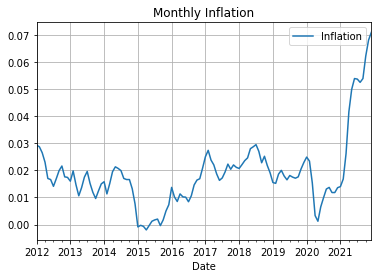

In [137]:
#Regular line chart
inflation_df.plot(title='Monthly Inflation', grid=True)

In [138]:
# Slice DataFrame into 1 year timeframe
inflation_2021 = inflation_df.loc["2021-01":"2021-12"]
inflation_2021

,Inflation
Date,
2021-01-01,0.0140
2021-02-01,0.0168
2021-03-01,0.0262
2021-04-01,0.0416
2021-05-01,0.0499
2021-06-01,0.0539
2021-07-01,0.0537
2021-08-01,0.0525
2021-09-01,0.0539


## Merging the 3 Portfolio and Inflation Data

In [140]:
# Capturing only Year and Month for Conservative
conservative_df = conservative_df.reset_index()
conservative_df['Date'] = conservative_df['Date'].apply(lambda x: x.strftime('%Y-%m'))
conservative_df.set_index('Date', inplace=True)

AttributeError: 'str' object has no attribute 'strftime'

In [139]:
# Capturing only Year and Month for Growth
growth_df = growth_df.reset_index()
growth_df['Date'] = growth_df['Date'].apply(lambda x: x.strftime('%Y-%m'))
growth_df.set_index('Date', inplace=True)


# Capturing only Year and Month for Modertate
moderate_df
moderate_df = moderate_df.reset_index()
moderate_df['Date'] = moderate_df['Date'].apply(lambda x: x.strftime('%Y-%m'))
moderate_df.set_index('Date', inplace=True)

#Concatenate Data frame
combined_return_inflation_df = pd.concat(
    [conservative_df, growth_df, moderate_df, inflation_df], axis="columns", join="inner"
)


#Adding Column Names
combined_return_inflation_df.columns = ["Conservative_Returns", "Growth_Returns", "Moderate_Returns", "Inflation_Rate"]
combined_return_inflation_df

,Conservative_Returns,Growth_Returns,Moderate_Returns,Inflation_Rate
Date,,,,
